In [13]:
import pandas as pd
import numpy as np

### Get normalized numeric data

In [50]:
allTrainingDataRaw = pd.read_csv('data/train.csv')

allTrainingLabels = allTrainingDataRaw['Transported']

allTrainingData = allTrainingDataRaw.fillna(value={
    'HomePlanet':'None',
    'CryoSleep':'None',
    'Cabin':'0/0/0',
    'Destination':'None',
    'Age':0,
    'VIP':'False',
    'RoomService':0,
    'FoodCourt':0,
    'ShoppingMall':0,
    'Spa':0,
    'VRDeck':0,
    'Name':'None'
})

allTrainingData[['CabinDeck','CabinNumber','CabinSide']] = allTrainingData['Cabin'].str.split('/').tolist()
allTrainingData['CabinNumber'] = allTrainingData['CabinNumber'].astype('float64')
allTrainingData = allTrainingData.drop(columns=['Cabin','Name'])
allTrainingDataNumeric = allTrainingData.select_dtypes(include='float64').join(
    pd.get_dummies(allTrainingData.select_dtypes(include='object').drop(columns=['PassengerId'])))

allTrainingDataNormalized = allTrainingDataNumeric.apply(lambda x: x/x.max(), axis=0)

valSplitIndex = 8000

trainingData = allTrainingDataNormalized.iloc[:valSplitIndex]
validationData = allTrainingDataNormalized.iloc[valSplitIndex:]

trainingLabels = allTrainingLabels.iloc[:valSplitIndex]
validationLabels = allTrainingLabels.iloc[valSplitIndex:]

### Build model

In [51]:
from keras import models
from keras import layers

inputLen = trainingData.shape[1]

model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(inputLen,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

### Train model

In [52]:
history = model.fit(trainingData, trainingLabels,
    epochs=20,
    batch_size=64,
    validation_data=(validationData, validationLabels))

Epoch 1/20
125/125 [==============================] - 1s 3ms/step - loss: 0.6925 - acc: 0.5354 - val_loss: 0.6612 - val_acc: 0.6320
Epoch 2/20
125/125 [==============================] - 0s 2ms/step - loss: 0.6503 - acc: 0.6802 - val_loss: 0.6228 - val_acc: 0.7157
Epoch 3/20
125/125 [==============================] - 0s 2ms/step - loss: 0.6235 - acc: 0.7283 - val_loss: 0.6025 - val_acc: 0.7403
Epoch 4/20
125/125 [==============================] - 0s 2ms/step - loss: 0.5998 - acc: 0.7316 - val_loss: 0.5798 - val_acc: 0.7431
Epoch 5/20
125/125 [==============================] - 0s 2ms/step - loss: 0.5682 - acc: 0.7385 - val_loss: 0.5536 - val_acc: 0.7446
Epoch 6/20
125/125 [==============================] - 0s 2ms/step - loss: 0.5402 - acc: 0.7471 - val_loss: 0.5353 - val_acc: 0.7460
Epoch 7/20
125/125 [==============================] - 0s 2ms/step - loss: 0.5222 - acc: 0.7502 - val_loss: 0.5223 - val_acc: 0.7504
Epoch 8/20
125/125 [==============================] - 0s 3ms/step - loss: 0.

### Plot accuracy

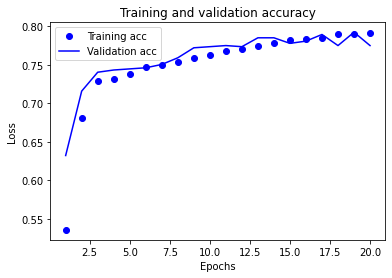

In [53]:
import matplotlib.pyplot as plt

history_dict = history.history
epochs = range(1, len(history_dict['acc']) + 1)

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Prepare test data

In [62]:
testDataRaw = pd.read_csv('data/test.csv')

testIds = testDataRaw['PassengerId']

testData = testDataRaw.fillna(value={
    'HomePlanet':'None',
    'CryoSleep':'None',
    'Cabin':'0/0/0',
    'Destination':'None',
    'Age':0,
    'VIP':'False',
    'RoomService':0,
    'FoodCourt':0,
    'ShoppingMall':0,
    'Spa':0,
    'VRDeck':0,
    'Name':'None'
})

testData[['CabinDeck','CabinNumber','CabinSide']] = testData['Cabin'].str.split('/').tolist()
testData['CabinNumber'] = testData['CabinNumber'].astype('float64')
testData = testData.drop(columns=['Cabin','Name'])
testDataNumeric = testData.select_dtypes(include='float64').join(
    pd.get_dummies(testData.select_dtypes(include='object').drop(columns=['PassengerId'])))

testData = testDataNumeric.apply(lambda x: x/x.max(), axis=0)


### Make predictions

In [76]:
predictions = model.predict(testData).tolist()
results = [[testIds[i], round(predictions[i][0])] for i in range(len(predictions))]

# write predictions to file for submission
with open('submissions/mySubmission1.csv','w',newline='') as submissionFile:

    writer = csv.writer(submissionFile,delimiter=',')
    writer.writerow(["PassengerID","Survived"])

    for result in results:
        writer.writerow(result)

134/134 [==============================] - 0s 1ms/step
